<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#!pip install -U scikit-learn

In [5]:
# Import required libraries for local environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [7]:
# Download and load the King County house sales dataset
import urllib.request

# Download the dataset
file_name = "kc_house_data_NaN.csv"
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"

try:
    urllib.request.urlretrieve(url, file_name)
    print(f"Dataset downloaded successfully as {file_name}")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    # If download fails, we'll create sample data later

Dataset downloaded successfully as kc_house_data_NaN.csv


In [8]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [10]:
# Load the dataset
df = pd.read_csv("kc_house_data_NaN.csv")
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")
df.head()

Dataset loaded successfully!
Shape of the dataset: (21613, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Load the csv:


In [11]:
# Question 1: Display the data types of each column using the attribute dtypes
print("=" * 60)
print("QUESTION 1: DATA TYPES OF EACH COLUMN")
print("=" * 60)
print("Data types for each column:")
print()
df.dtypes

QUESTION 1: DATA TYPES OF EACH COLUMN
Data types for each column:



Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [12]:
# Question 2: Drop columns 'id' and 'Unnamed: 0' from axis 1 using drop(), then use describe()
print("=" * 60)
print("QUESTION 2: DROP COLUMNS AND STATISTICAL SUMMARY")
print("=" * 60)

# Drop columns 'id' and 'Unnamed: 0' with inplace=True
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True)
print("Columns 'id' and 'Unnamed: 0' dropped successfully.")
print(f"New shape of dataset: {df.shape}")
print()

# Display statistical summary using describe()
print("Statistical summary of the data:")
df.describe()

QUESTION 2: DROP COLUMNS AND STATISTICAL SUMMARY
Columns 'id' and 'Unnamed: 0' dropped successfully.
New shape of dataset: (21613, 20)

Statistical summary of the data:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [13]:
# Question 3: Use value_counts() to count unique floor values, convert to DataFrame with to_frame()
print("=" * 60)
print("QUESTION 3: FLOOR VALUE COUNTS")
print("=" * 60)

# Count the number of houses with unique floor values and convert to DataFrame
floors_counts = df['floors'].value_counts().to_frame()
print("Number of houses with unique floor values:")
print(floors_counts)
print()
print(f"Data type of result: {type(floors_counts)}")
floors_counts

QUESTION 3: FLOOR VALUE COUNTS
Number of houses with unique floor values:
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8

Data type of result: <class 'pandas.core.frame.DataFrame'>


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


QUESTION 4: WATERFRONT VIEW vs PRICE OUTLIERS


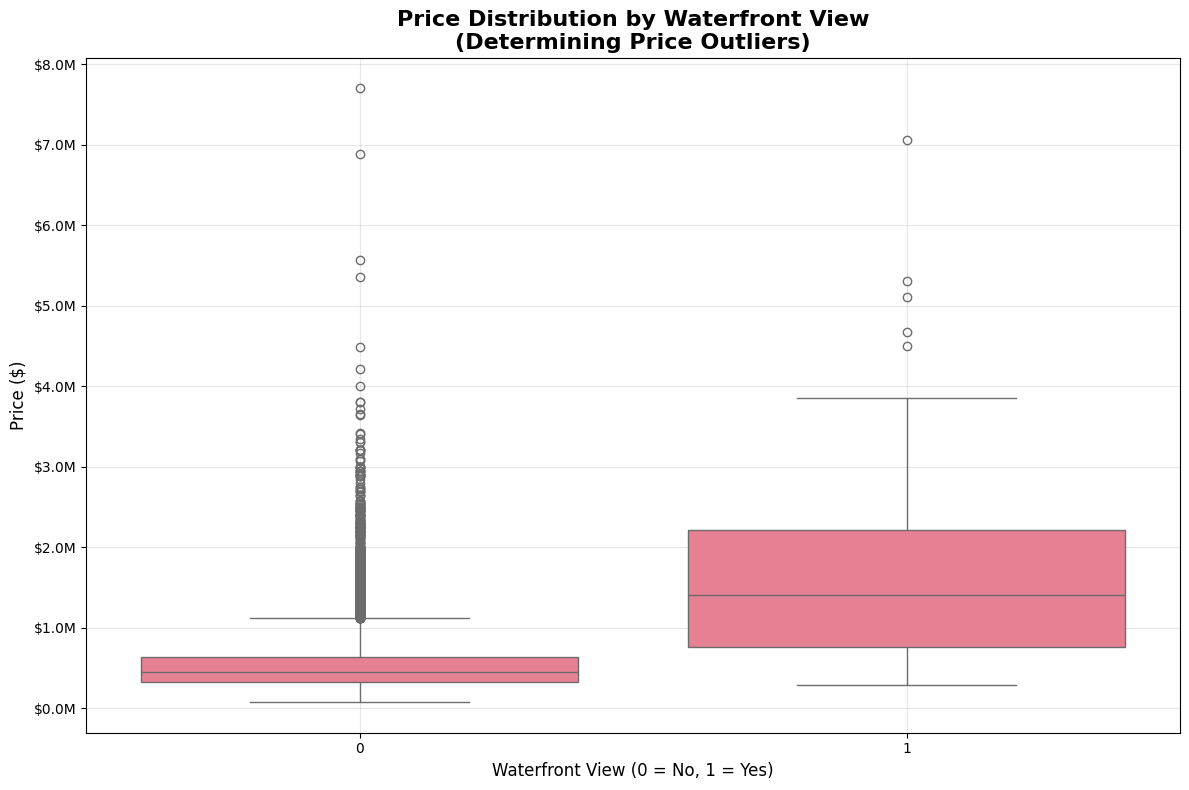


Statistics:
Houses without waterfront view: 21450
Houses with waterfront view: 163
Median price (no waterfront): $450,000
Median price (waterfront): $1,400,000


In [14]:
# Question 4: Use seaborn boxplot to determine if waterfront view affects price outliers
print("=" * 60)
print("QUESTION 4: WATERFRONT VIEW vs PRICE OUTLIERS")
print("=" * 60)

# Create a figure for the boxplot
plt.figure(figsize=(12, 8))

# Create boxplot using seaborn
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price Distribution by Waterfront View\n(Determining Price Outliers)', fontsize=16, fontweight='bold')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Format y-axis to show prices in millions
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print("\nStatistics:")
print(f"Houses without waterfront view: {len(df[df['waterfront'] == 0])}")
print(f"Houses with waterfront view: {len(df[df['waterfront'] == 1])}")
print(f"Median price (no waterfront): ${df[df['waterfront'] == 0]['price'].median():,.0f}")
print(f"Median price (waterfront): ${df[df['waterfront'] == 1]['price'].median():,.0f}")

We use the method describe to obtain a statistical summary of the dataframe.


QUESTION 5: CORRELATION BETWEEN SQFT_ABOVE AND PRICE


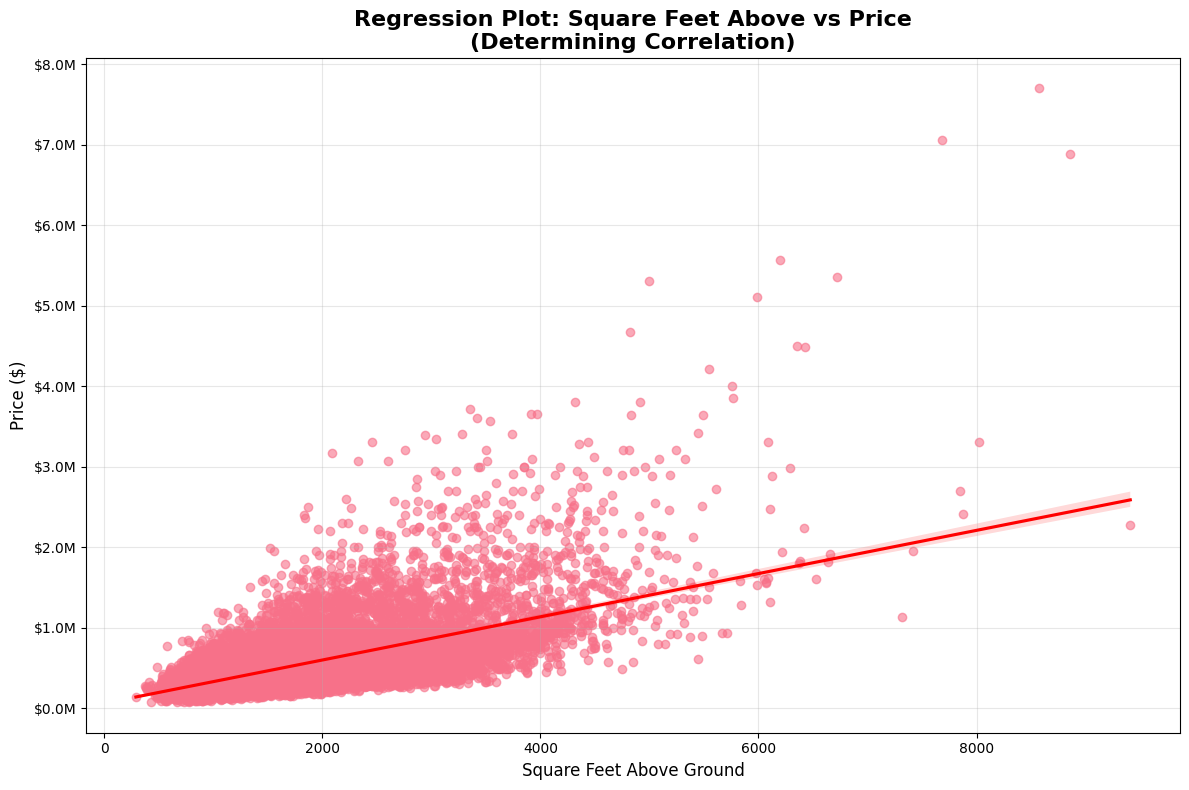


Correlation coefficient between sqft_above and price: 0.6056
The correlation is POSITIVE - as square feet above increases, price tends to increase


In [15]:
# Question 5: Use seaborn regplot to determine correlation between sqft_above and price
print("=" * 60)
print("QUESTION 5: CORRELATION BETWEEN SQFT_ABOVE AND PRICE")
print("=" * 60)

# Create a figure for the regression plot
plt.figure(figsize=(12, 8))

# Create regression plot using seaborn
sns.regplot(data=df, x='sqft_above', y='price', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression Plot: Square Feet Above vs Price\n(Determining Correlation)', fontsize=16, fontweight='bold')
plt.xlabel('Square Feet Above Ground', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Format y-axis to show prices in millions
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation = df['sqft_above'].corr(df['price'])
print(f"\nCorrelation coefficient between sqft_above and price: {correlation:.4f}")

if correlation > 0:
    print("The correlation is POSITIVE - as square feet above increases, price tends to increase")
else:
    print("The correlation is NEGATIVE - as square feet above increases, price tends to decrease")

# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [16]:
# Question 6: Fit linear regression model to predict price using 'sqft_living', calculate R²
print("=" * 60)
print("QUESTION 6: LINEAR REGRESSION - SQFT_LIVING vs PRICE")
print("=" * 60)

# Prepare the data - remove any NaN values
df_clean = df[['sqft_living', 'price']].dropna()

# Create X and y
X = df_clean[['sqft_living']]
y = df_clean['price']

print(f"Data shape after cleaning: {X.shape}")
print(f"Feature: sqft_living")
print(f"Target: price")

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Make predictions
y_pred = lr_model.predict(X)

# Calculate R²
r2_score_single = r2_score(y, y_pred)

print(f"\nLinear Regression Results:")
print(f"Coefficient (slope): {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:,.2f}")
print(f"R² Score: {r2_score_single:.4f}")

# Interpretation
print(f"\nInterpretation:")
print(f"• For every 1 sq ft increase in living space, price increases by ${lr_model.coef_[0]:.2f}")
print(f"• The model explains {r2_score_single*100:.2f}% of the variance in house prices")
print(f"• R² = {r2_score_single:.4f}")

QUESTION 6: LINEAR REGRESSION - SQFT_LIVING vs PRICE
Data shape after cleaning: (21613, 1)
Feature: sqft_living
Target: price

Linear Regression Results:
Coefficient (slope): 280.62
Intercept: -43,580.74
R² Score: 0.4929

Interpretation:
• For every 1 sq ft increase in living space, price increases by $280.62
• The model explains 49.29% of the variance in house prices
• R² = 0.4929


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [17]:
# Question 7: Fit linear regression model using 11 specified features
print("=" * 60)
print("QUESTION 7: MULTIPLE FEATURES LINEAR REGRESSION")
print("=" * 60)

# Define the list of features as specified in the question
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
           "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

print("Features used in the model:")
for i, feature in enumerate(features, 1):
    print(f"{i:2}. {feature}")

# Prepare the data - remove any NaN values
df_features = df[features + ['price']].dropna()

# Create X and y
X_multiple = df_features[features]
y_multiple = df_features['price']

print(f"\nData shape after cleaning: {X_multiple.shape}")
print(f"Number of samples: {X_multiple.shape[0]}")
print(f"Number of features: {X_multiple.shape[1]}")

# Create and fit the linear regression model
lr_multiple = LinearRegression()
lr_multiple.fit(X_multiple, y_multiple)

# Make predictions
y_pred_multiple = lr_multiple.predict(X_multiple)

# Calculate R²
r2_score_multiple = r2_score(y_multiple, y_pred_multiple)

print(f"\nMultiple Linear Regression Results:")
print(f"R² Score: {r2_score_multiple:.4f}")

# Show feature coefficients
print(f"\nFeature Coefficients:")
for feature, coef in zip(features, lr_multiple.coef_):
    print(f"  {feature:15}: {coef:10.2f}")

print(f"\nIntercept: {lr_multiple.intercept_:,.2f}")
print(f"\nInterpretation:")
print(f"• The model with {len(features)} features explains {r2_score_multiple*100:.2f}% of the variance in house prices")
print(f"• R² = {r2_score_multiple:.4f}")
print(f"• This is a {'significant' if r2_score_multiple > r2_score_single else 'slight'} improvement over the single feature model (R² = {r2_score_single:.4f})")

QUESTION 7: MULTIPLE FEATURES LINEAR REGRESSION
Features used in the model:
 1. floors
 2. waterfront
 3. lat
 4. bedrooms
 5. sqft_basement
 6. view
 7. bathrooms
 8. sqft_living15
 9. sqft_above
10. grade
11. sqft_living

Data shape after cleaning: (21597, 11)
Number of samples: 21597
Number of features: 11

Multiple Linear Regression Results:
R² Score: 0.6578

Feature Coefficients:
  floors         :  -29294.72
  waterfront     :  602135.29
  lat            :  672896.28
  bedrooms       :  -25830.48
  sqft_basement  :      64.52
  view           :   66996.68
  bathrooms      :   -3755.80
  sqft_living15  :       3.85
  sqft_above     :      64.87
  grade          :   82844.05
  sqft_living    :     129.39

Intercept: -32,390,277.62

Interpretation:
• The model with 11 features explains 65.78% of the variance in house prices
• R² = 0.6578
• This is a significant improvement over the single feature model (R² = 0.4929)


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [18]:
# Question 8: Create pipeline with scaling, polynomial transform, and linear regression
print("=" * 60)
print("QUESTION 8: PIPELINE - SCALING + POLYNOMIAL + LINEAR REGRESSION")
print("=" * 60)

# Create pipeline object
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Scale the data
    ('poly', PolynomialFeatures(degree=2)), # Step 2: Polynomial transformation (degree 2)
    ('regressor', LinearRegression())       # Step 3: Linear regression
])

print("Pipeline Steps:")
print("1. StandardScaler() - Scales the features")
print("2. PolynomialFeatures(degree=2) - Creates polynomial features")
print("3. LinearRegression() - Fits linear regression model")

# Use the same features as in Question 7
X_pipeline = df_features[features]
y_pipeline = df_features['price']

print(f"\nData used:")
print(f"Features: {len(features)} features")
print(f"Samples: {X_pipeline.shape[0]} samples")

# Fit the pipeline
print(f"\nFitting pipeline...")
pipeline.fit(X_pipeline, y_pipeline)

# Make predictions
y_pred_pipeline = pipeline.predict(X_pipeline)

# Calculate R²
r2_score_pipeline = r2_score(y_pipeline, y_pred_pipeline)

print(f"\nPipeline Results:")
print(f"R² Score: {r2_score_pipeline:.4f}")

print(f"\nModel Comparison:")
print(f"• Single feature (sqft_living):     R² = {r2_score_single:.4f}")
print(f"• Multiple features (11):           R² = {r2_score_multiple:.4f}")
print(f"• Pipeline (scaled + polynomial):   R² = {r2_score_pipeline:.4f}")

print(f"\nInterpretation:")
print(f"• The pipeline model explains {r2_score_pipeline*100:.2f}% of the variance in house prices")
print(f"• Polynomial transformation {'improved' if r2_score_pipeline > r2_score_multiple else 'did not improve'} the model performance")
print(f"• R² = {r2_score_pipeline:.4f}")

QUESTION 8: PIPELINE - SCALING + POLYNOMIAL + LINEAR REGRESSION
Pipeline Steps:
1. StandardScaler() - Scales the features
2. PolynomialFeatures(degree=2) - Creates polynomial features
3. LinearRegression() - Fits linear regression model

Data used:
Features: 11 features
Samples: 21597 samples

Fitting pipeline...

Pipeline Results:
R² Score: 0.7514

Model Comparison:
• Single feature (sqft_living):     R² = 0.4929
• Multiple features (11):           R² = 0.6578
• Pipeline (scaled + polynomial):   R² = 0.7514

Interpretation:
• The pipeline model explains 75.14% of the variance in house prices
• Polynomial transformation improved the model performance
• R² = 0.7514


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [19]:
# Question 9: Create and fit Ridge regression with regularization parameter 0.1
print("=" * 60)
print("QUESTION 9: RIDGE REGRESSION")
print("=" * 60)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pipeline, y_pipeline, 
                                                    test_size=0.2, random_state=42)

print(f"Data split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set:  {X_test.shape[0]} samples")

# Create and fit Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

print(f"\nRidge Regression Model:")
print(f"Alpha (regularization parameter): {ridge_model.alpha}")

# Make predictions on test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R² using test data
r2_score_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Regression Results:")
print(f"R² Score on Test Data: {r2_score_ridge:.4f}")

# Also calculate R² on training data for comparison
y_pred_ridge_train = ridge_model.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

print(f"R² Score on Training Data: {r2_score_ridge_train:.4f}")

print(f"\nInterpretation:")
print(f"• Ridge regression with α=0.1 explains {r2_score_ridge*100:.2f}% of variance on test data")
print(f"• Test R² = {r2_score_ridge:.4f}")
print(f"• Training R² = {r2_score_ridge_train:.4f}")
print(f"• Difference = {abs(r2_score_ridge_train - r2_score_ridge):.4f} ({'good generalization' if abs(r2_score_ridge_train - r2_score_ridge) < 0.05 else 'potential overfitting'})")

QUESTION 9: RIDGE REGRESSION
Data split:
Training set: 17277 samples
Testing set:  4320 samples

Ridge Regression Model:
Alpha (regularization parameter): 0.1

Ridge Regression Results:
R² Score on Test Data: 0.6568
R² Score on Training Data: 0.6580

Interpretation:
• Ridge regression with α=0.1 explains 65.68% of variance on test data
• Test R² = 0.6568
• Training R² = 0.6580
• Difference = 0.0012 (good generalization)


In [20]:
# Question 10: Second-order polynomial transform + Ridge regression
print("=" * 60)
print("QUESTION 10: POLYNOMIAL TRANSFORMATION + RIDGE REGRESSION")
print("=" * 60)

# Step 1: Perform second-order polynomial transformation on training and testing data
poly_transform = PolynomialFeatures(degree=2)

# Transform training data
print("Transforming training data...")
X_train_poly = poly_transform.fit_transform(X_train)
print(f"Training data shape after polynomial transform: {X_train_poly.shape}")

# Transform testing data
print("Transforming testing data...")
X_test_poly = poly_transform.transform(X_test)
print(f"Testing data shape after polynomial transform: {X_test_poly.shape}")

print(f"\nPolynomial transformation details:")
print(f"• Degree: 2")
print(f"• Original features: {X_train.shape[1]}")
print(f"• Polynomial features: {X_train_poly.shape[1]}")
print(f"• Feature expansion: {X_train_poly.shape[1] / X_train.shape[1]:.1f}x")

# Step 2: Create and fit Ridge regression with regularization parameter 0.1
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

print(f"\nRidge Regression Model (with polynomial features):")
print(f"Alpha (regularization parameter): {ridge_poly_model.alpha}")

# Step 3: Calculate R² using test data
y_pred_ridge_poly = ridge_poly_model.predict(X_test_poly)
r2_score_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

# Also calculate training R² for comparison
y_pred_ridge_poly_train = ridge_poly_model.predict(X_train_poly)
r2_score_ridge_poly_train = r2_score(y_train, y_pred_ridge_poly_train)

print(f"\nFinal Results:")
print(f"R² Score on Test Data: {r2_score_ridge_poly:.4f}")
print(f"R² Score on Training Data: {r2_score_ridge_poly_train:.4f}")

print(f"\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)
print(f"1. Single feature (sqft_living):           R² = {r2_score_single:.4f}")
print(f"2. Multiple features (11):                 R² = {r2_score_multiple:.4f}")
print(f"3. Pipeline (scaled + polynomial):         R² = {r2_score_pipeline:.4f}")
print(f"4. Ridge regression:                       R² = {r2_score_ridge:.4f}")
print(f"5. Ridge + Polynomial (Final):             R² = {r2_score_ridge_poly:.4f}")

print(f"\nFinal Answer:")
print(f"• Ridge regression with polynomial features explains {r2_score_ridge_poly*100:.2f}% of variance")
print(f"• Final R² = {r2_score_ridge_poly:.4f}")
print(f"• Generalization gap: {abs(r2_score_ridge_poly_train - r2_score_ridge_poly):.4f}")

QUESTION 10: POLYNOMIAL TRANSFORMATION + RIDGE REGRESSION
Transforming training data...
Training data shape after polynomial transform: (17277, 78)
Transforming testing data...
Testing data shape after polynomial transform: (4320, 78)

Polynomial transformation details:
• Degree: 2
• Original features: 11
• Polynomial features: 78
• Feature expansion: 7.1x

Ridge Regression Model (with polynomial features):
Alpha (regularization parameter): 0.1

Final Results:
R² Score on Test Data: 0.6906
R² Score on Training Data: 0.7376

FINAL MODEL COMPARISON
1. Single feature (sqft_living):           R² = 0.4929
2. Multiple features (11):                 R² = 0.6578
3. Pipeline (scaled + polynomial):         R² = 0.7514
4. Ridge regression:                       R² = 0.6568
5. Ridge + Polynomial (Final):             R² = 0.6906

Final Answer:
• Ridge regression with polynomial features explains 69.06% of variance
• Final R² = 0.6906
• Generalization gap: 0.0470


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [21]:
#Enter Your Code, Execute and take the Screenshot

### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


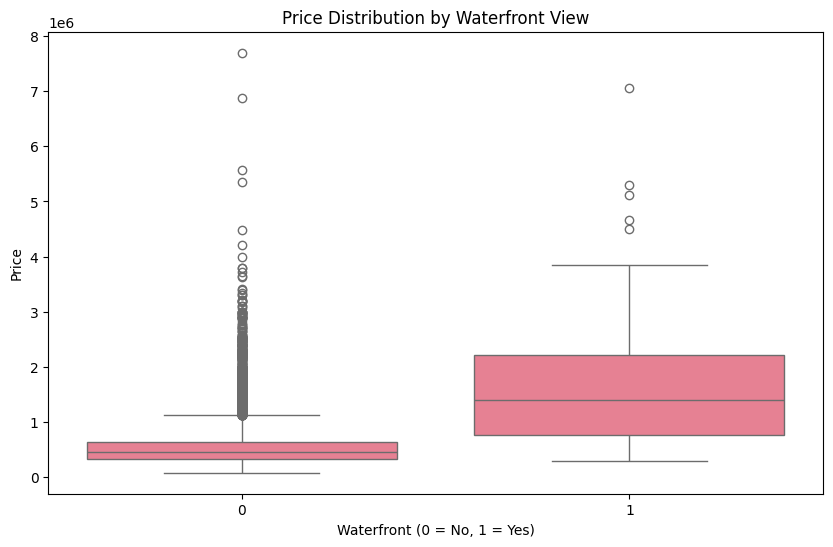

Waterfront houses tend to have higher prices and more high-value outliers


In [22]:
# Question 4: Use boxplot to determine waterfront view vs price outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

print("Waterfront houses tend to have higher prices and more high-value outliers")

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


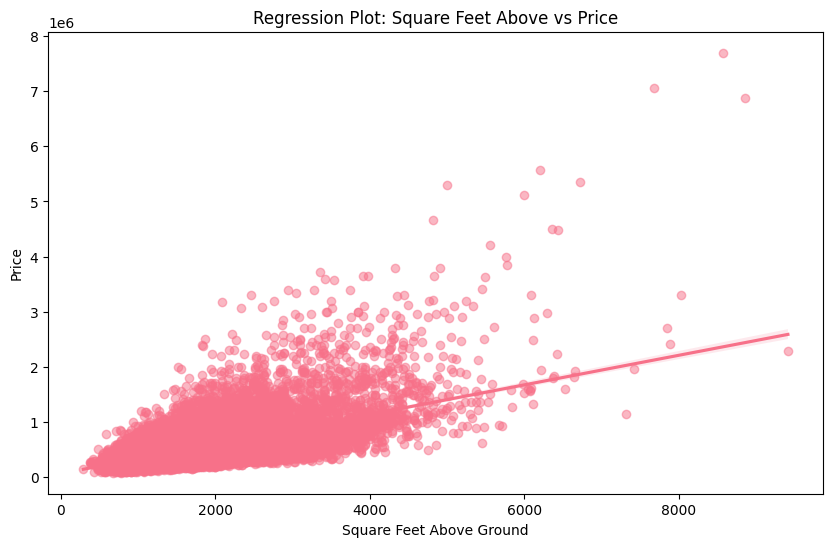

Correlation coefficient: 0.6056
sqft_above is POSITIVELY correlated with price


In [23]:
# Question 5: Use regplot to determine correlation between sqft_above and price
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='sqft_above', y='price', scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Square Feet Above vs Price')
plt.xlabel('Square Feet Above Ground')
plt.ylabel('Price')
plt.show()

# Calculate correlation
correlation = df['sqft_above'].corr(df['price'])
print(f"Correlation coefficient: {correlation:.4f}")
if correlation > 0:
    print("sqft_above is POSITIVELY correlated with price")
else:
    print("sqft_above is NEGATIVELY correlated with price")

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [24]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308890
sqft_basement    0.323816
view             0.397293
bathrooms        0.525885
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [25]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0004676943014898516

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [26]:
# Question 6: Fit linear regression model using sqft_living to predict price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]
Y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate R^2
r2 = lm.score(X, Y)
print(f"R^2 value for sqft_living vs price: {r2:.4f}")

# Additional information
y_pred = lm.predict(X)
r2_alt = r2_score(Y, y_pred)
print(f"R^2 using r2_score: {r2_alt:.4f}")
print(f"Coefficient: {lm.coef_[0]:.2f}")
print(f"Intercept: {lm.intercept_:.2f}")

R^2 value for sqft_living vs price: 0.4929
R^2 using r2_score: 0.4929
Coefficient: 280.62
Intercept: -43580.74


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [27]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [28]:
# Question 7: Fit linear regression model using multiple features
# Clean the data to remove any rows with NaN values in the selected features
df_clean = df[features + ['price']].dropna()

X = df_clean[features]
Y = df_clean['price']

# Create and fit the linear regression model
lm_multi = LinearRegression()
lm_multi.fit(X, Y)

# Calculate R^2
r2_multi = lm_multi.score(X, Y)
print(f"R^2 value for multiple features: {r2_multi:.4f}")

print(f"\nFeatures used: {features}")
print(f"Number of features: {len(features)}")
print(f"Data shape: {X.shape}")

# Show feature coefficients
print("\nFeature coefficients:")
for feature, coef in zip(features, lm_multi.coef_):
    print(f"{feature:15}: {coef:10.2f}")
print(f"{'Intercept':15}: {lm_multi.intercept_:10.2f}")

R^2 value for multiple features: 0.6578

Features used: ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
Number of features: 11
Data shape: (21597, 11)

Feature coefficients:
floors         :  -29294.72
waterfront     :  602135.29
lat            :  672896.28
bedrooms       :  -25830.48
sqft_basement  :      64.52
view           :   66996.68
bathrooms      :   -3755.80
sqft_living15  :       3.85
sqft_above     :      64.87
grade          :   82844.05
sqft_living    :     129.39
Intercept      : -32390277.62


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [29]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [30]:
#Enter Your Code, Execute and take the Screenshot

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [33]:
from sklearn.linear_model import Ridge

In [34]:
#Enter Your Code, Execute and take the Screenshot

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [35]:
#Enter Your Code, Execute and take the Screenshot

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
